## A data approach to start-ups
****

<b><i>Idea:</i></b> Working in the world of M&A data, I am constantly exposed to start-ups and their evolution. What always surprises me is how some start-ups manage to get acquired at lofty valuations, sometimes in the billions of dollars, while other start-ups disappear entirely. Take Snapchat – now known as Snap Inc – for example. This messaging app has recently undergone the biggest tech IPO of the year at a valuation of USD 25bn. By contrast, Barnes & Noble, probably the most well-known bookstore chain in the US, with its 130-year history and close to 640 brick-and-mortar stores around the country, has a market cap of USD 760m, 30x times less than the expected market cap of Snapchat! Snapchat’s idea was original to some degree but not unique. There had been start-ups alongside Snapchat that had proposed similar ideas: Wickr, Hash, Ansa, Secret. Wickr still exists, but the other three have disappeared. The million-dollar question is: who could have predicted Snapchat's success early on and who could have predicted Secret's failure? This question has always been of huge interest to me, and I am hoping to answer it with this capstone project. <br></br><br></br>
<b><i>Target audience:</i></b> This project is intended for anyone looking to start a business. Which factors should they consider when looking for financing? How many funding rounds are optimal for success? Which investors have a track record of helping companies succeed? Most importantly, is it even possible to forecast success given some observable parameters at an early stage?

<b><i>Previous studies:</i></b> This study question is interesting, but it is not new. Several studies have been done assessing factors influencing start-up growth. Previous studies have focused on education vs. experience of entrepreneurs, management style, cash-burn-rate in the first year, and even the name of a start-up. Most of the studies are based on surveys or on data focusing on specific geographies. However, no expansive, <i>predictive</i> study using historical, comprehensive dataset is known to date. 


<b><i>Data:</i></b> The data for the project came from crunchbase, a data company: https://www.crunchbase.com/
Crunchbase data on startups is broken down into three separate datasets: <b>companies</b> (with specific information on companies), <b>acquisitions</b> (which includes information on acquisitions by startups and of startups), and <b>investments</b> (which focuses on VC funding rounds).

The three datasets used in the project were downloaded on <b>December 4th 2015</b> and were made available on github by a different user. 

Use of this data is governed by the [CrunchBase Terms of Service and Licensing Policy](https://about.crunchbase.com/docs/terms-of-service/). 
****

### Data exploration

I was curious to learn what data would say about startups, beginning with simple questions, such as which countries have the most startups and what is the percentage of those startups that are still operating vs. those that have already closed. The ultimate research question is whether the choice of an investor, timing of funding, and total funding received have any influence on company's success (as determined by the company getting acquired or getting listed) or failure (as manifested by the company closing down). I will attempt to visualize this research question in my data story.

Let's start by loading different packages that will help us explore all three datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sb

<b>Companies dataset </b>

Next, we will begin by exploring the first dataset, companies.csv, which is supposed to be an overview of available start-ups. 

In [2]:
companies = pd.DataFrame.from_csv('companies.csv', index_col = None)

In [3]:
companies[0:4]

,permalink,name,homepage_url,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at,id
0,/company/8868,8868,http://www.8868.cn,NaN,NaN,operating,NaN,NaN,unknown,NaN,1,NaN,NaN,NaN,NaN,12/1/2013,12/1/2013,NaN,1
1,/company/21e6,2.10E+07,NaN,NaN,5050000.0,operating,USA,CA,SF Bay,San Francisco,1,1/1/2013,2013-01,2013-Q1,2013.0,11/17/2013,11/17/2013,NaN,2
2,/company/club-domains,.Club Domains,http://dotclub.com,software,7000000.0,operating,USA,FL,Fort Lauderdale,Oakland Park,1,10/10/2011,2011-10,2011-Q4,2011.0,5/31/2013,5/31/2013,NaN,3
3,/company/fox-networks,.Fox Networks,http://www.dotfox.com,advertising,4912394.0,closed,ARG,NaN,Buenos Aires,Buenos Aires,1,NaN,NaN,NaN,NaN,1/16/2007,1/16/2007,7/1/2008,4


We can also look at one specific company on the list:

In [4]:
companies.ix[1]

C:\Users\Lana\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


permalink            /company/21e6
name                      2.10E+07
homepage_url                   NaN
category_code                  NaN
funding_total_usd         5.05e+06
status                   operating
country_code                   USA
state_code                      CA
region                      SF Bay
city                 San Francisco
funding_rounds                   1
founded_at                1/1/2013
founded_month             2013-01 
founded_quarter            2013-Q1
founded_year                  2013
first_funding_at        11/17/2013
last_funding_at         11/17/2013
last_milestone_at              NaN
id                               2
Name: 1, dtype: object

Even though it might seem that there is something wrong with the company name, the company's real name is in fact 21e6 -- it's a bitcoin startup. 

Another observation is that several fields for this company have missing information, and we will have to account for that in our future analysis.

Next, let's check the type of all columns in the dataset to make sure we can use them for our analysis going forward.

In [5]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27327 entries, 0 to 27326
Data columns (total 19 columns):
permalink            27327 non-null object
name                 27327 non-null object
homepage_url         25940 non-null object
category_code        26298 non-null object
funding_total_usd    24010 non-null float64
status               27327 non-null object
country_code         25504 non-null object
state_code           16872 non-null object
region               27327 non-null object
city                 24705 non-null object
funding_rounds       27327 non-null int64
founded_at           21441 non-null object
founded_month        21441 non-null object
founded_quarter      21441 non-null object
founded_year         21441 non-null float64
first_funding_at     27176 non-null object
last_funding_at      27176 non-null object
last_milestone_at    14604 non-null object
id                   27327 non-null int64
dtypes: float64(2), int64(2), object(15)
memory usage: 4.0+ MB


Almost all columns are of type object, including those columns containing dates (first_funding_at, last_funding_at, and last_milestone_at). Two columns are of type float (funding_total_usd and founded_year) and one column is of type int (funding_rounds).

Next, let's ask a few basic questions about the dataset to get to know that data better.

##### How many companies are in the dataset and what is the distrubution of companies across the globe?

In [6]:
print("Number of companies in the dataset {:2f}".format(companies['permalink'].count()))

Number of companies in the dataset 27327.000000


In [7]:
countries = companies.country_code.dropna()
from collections import Counter
countries_dict = Counter(countries)
sorted_countries = sorted(countries_dict.items(), key = lambda x: x[1], reverse = True)
sorted_countries[0:14]

[('USA', 17053),
 ('GBR', 1629),
 ('CAN', 852),
 ('DEU', 622),
 ('FRA', 589),
 ('IND', 505),
 ('ISR', 457),
 ('ESP', 309),
 ('CHN', 299),
 ('SWE', 227),
 ('ITA', 202),
 ('AUS', 201),
 ('IRL', 193),
 ('NLD', 181)]

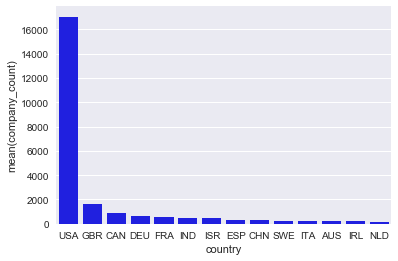

In [8]:
countries_df = pd.DataFrame(sorted_countries[0:14])
countries_df.columns = ['country', 'company_count']

%matplotlib inline

sb.barplot(x ='country', y ='company_count', color = 'blue', data = countries_df)


Looking at the chart, we can already tell that most startups are based in the US, with UK and Canada being distant second and third. While it is reasonable to suppose that US has the most startups, it might also indicate a selection bias due to available data on startups (presumably, it might be easier to come across startup data in the US, or, alternatively, companies in the US might be more inclined to add their data to crunchbase).

That's one of the basic questions about the data. Now let's look further into questions that are more closely related to our research problem, which is centered around success and failure of startups.

##### How many companies are operating, were acquired, got listed, or had to close down?

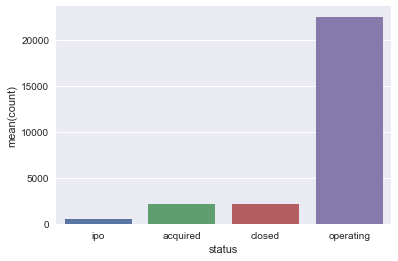

In [9]:
operating = companies[companies.status == 'operating'].permalink.count()
closed = companies[companies.status == 'closed'].permalink.count()
acquired = companies[companies.status == 'acquired'].permalink.count()
ipo = companies[companies.status == 'ipo'].permalink.count()
oper_closed_dict = {'operating': operating, 'closed': closed, 'acquired': acquired, 'ipo': ipo}
oper_closed_df = pd.DataFrame.from_dict(oper_closed_dict, orient = 'index')

oper_closed_df.reset_index(inplace = True)
oper_closed_df.columns = ['status', 'count']

sb.barplot(data = oper_closed_df, x = 'status', y='count')

Here are the more precise numbers:

In [10]:
oper_closed_df

,status,count
0,ipo,475
1,acquired,2176
2,closed,2153
3,operating,22523


Based on the data, we can see that less than 10% of companies are identified as closed in the database, while a similar number of startups have already been acquired.

It is those closed (unsuccessful) vs. acquired or listed (successful) companies that we will be particularly interested in later in our analysis.

##### Year founded and status

There might be a correlation between year founded and the status of a company, so let's visualize those two parameters. For example, companies founded during recession or right before recession might have a higher probability of closing down. Let's explore that.

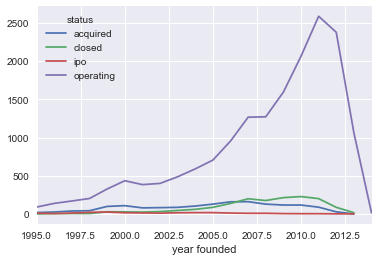

In [11]:
year_founded = companies['founded_year']
status = companies['status']
year_vs_status = {'year founded': year_founded, 'status': status}
year_vs_status_df = pd.DataFrame(year_vs_status)
new_dict = year_vs_status_df.groupby('status')['year founded'].value_counts()
new_df = pd.DataFrame.from_dict(new_dict)
new_df = new_df.unstack()
new_df = new_df.transpose()
new_df = new_df.reset_index()
new_df = new_df.drop('level_0',1)
new_df = new_df.tail(20)

# let's do a line graph of year_founded vs. status
sb.set_style("darkgrid")
new_df.plot(x = 'year founded')

Excluding operating companies, most of which were founed after 2010, as expected:

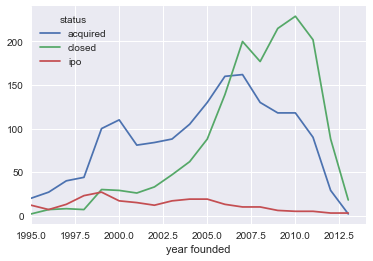

In [12]:
without_oper = new_df.drop('operating', 1)
sb.set_style("darkgrid")
without_oper.plot(x = 'year founded')

What is interesting in this chart is that a lot of companies that got listed were founded between 1995 and 2000, which is actually quite reasonable and might suggest that it takes some time for companies to mature enough to get listed.

Let's also visualize when all companies in the database got founded, regardless of the status. This will help us compare ipo'ed companies to the 'average' company, for example.

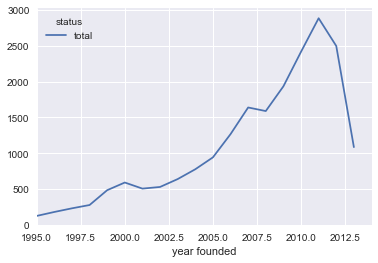

In [13]:
new_df['total'] = new_df['acquired'] + new_df['ipo'] + new_df['closed'] + new_df['operating']
only_total = new_df.drop(['acquired', 'closed', 'ipo', 'operating'], 1)
sb.set_style("darkgrid")
only_total.plot(x = 'year founded')

More and more start-ups seem to be founded each year, with a sharp increase between 2008 and 2011, during recession years, which is actually quite interesting.

##### Visualizing total funding vs. status (operating or closed) might also shed some light on our research question.

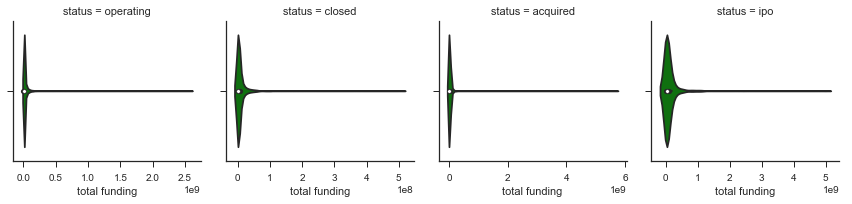

In [14]:
total_funding = companies['funding_total_usd']
status = companies['status']
funding_vs_status = {'total funding': total_funding, 'status': status}
fund_vs_status_df = pd.DataFrame(funding_vs_status)

sb.set(style="ticks", color_codes=True)
g = sb.FacetGrid(fund_vs_status_df, col="status", sharex = False)
g = g.map(sb.violinplot, "total funding", color = "green")

What is interesting here is that, while companies that closed have similar funding size distribution patterns compared to other companies, those that were acquired or got listed are notable for extreme outlier cases. We can have a look at some of those, namely, companies with over US$ 100m in total funding.

In [15]:
large_funding = companies['funding_total_usd'] > 100000000
companies[large_funding]["status"].value_counts()

operating    392
ipo          103
acquired      52
closed        14
Name: status, dtype: int64

In [17]:
#and in proportion form:
companies[large_funding]["status"].value_counts()/len(companies[large_funding])

operating    0.698752
ipo          0.183601
acquired     0.092692
closed       0.024955
Name: status, dtype: float64

These numbers show that for the subset of startups that received total funding over $100m, most companies ended up being listed (18.4%), with only 14 (2.5%) closing down. For comparison purposes, the proportion of closed companies in the entire dataset is 7.9% compared to 1.7% for listed companies. 

Let's check the other end of the spectrum and chek those companies that received no funding.

In [18]:
no_funding = companies.funding_total_usd.isnull()
companies[no_funding]["status"].value_counts()

operating    2737
closed        346
acquired      212
ipo            22
Name: status, dtype: int64

In [19]:
companies[no_funding]["status"].value_counts()/len(companies[no_funding])

operating    0.825143
closed       0.104311
acquired     0.063913
ipo          0.006632
Name: status, dtype: float64

Here, as expected, the effect is reversed: only 0.7% of companies with no prior funding got listed, while more than the average number of companies closed down (10.4%). The only problem to be aware of here -- NaN funding might not mean that the company had no funding whatsoever, it might also mean that we don't have enough information on the funding. So for now, we will avoid making any conclusions about 0 funding from the table.

#### What is the distribution of closed companies vs. operating companies by sector?

In [20]:
sector_status_acquired = companies[companies.status == 'acquired'].category_code.value_counts()
sector_status_operating = companies[companies.status == 'operating'].category_code.value_counts()
sector_status_closed = companies[companies.status == 'closed'].category_code.value_counts()
sector_status_ipo = companies[companies.status == 'ipo'].category_code.value_counts()

sector_status_dict = {'acquired': sector_status_acquired, 'operating': sector_status_operating, 'closed': sector_status_closed, 'ipo': sector_status_ipo}

sector_status_df = pd.DataFrame.from_dict(sector_status_dict)
sector_status_df = sector_status_df.fillna(value = 0)
sector_status_df['proportion_acq'] = sector_status_df['acquired']/(sector_status_df['acquired']+sector_status_df['closed']+sector_status_df['operating']+sector_status_df['ipo'])
sector_status_df['proportion_oper'] = sector_status_df['operating']/(sector_status_df['acquired']+sector_status_df['closed']+sector_status_df['operating']+sector_status_df['ipo'])
sector_status_df['proportion_ipo'] = sector_status_df['ipo']/(sector_status_df['acquired']+sector_status_df['closed']+sector_status_df['operating']+sector_status_df['ipo'])
sector_status_df['proportion_closed'] = sector_status_df['closed']/(sector_status_df['acquired']+sector_status_df['closed']+sector_status_df['operating']+sector_status_df['ipo'])


##### top sector for acquired companies

In [21]:
#top sector for acquired (by proportion)
sector_status_df[sector_status_df.proportion_acq == sector_status_df.proportion_acq.max()]

,acquired,closed,ipo,operating,proportion_acq,proportion_oper,proportion_ipo,proportion_closed
network_hosting,72.0,35.0,14.0,296,0.172662,0.709832,0.033573,0.083933


In [22]:
#and by the actual value
sector_status_df[sector_status_df.acquired == sector_status_df.acquired.max()]

,acquired,closed,ipo,operating,proportion_acq,proportion_oper,proportion_ipo,proportion_closed
software,384.0,272.0,36.0,3127,0.10055,0.818801,0.009427,0.071223


##### top sector for operating companies

In [23]:
#top sector for operating by proportion:
sector_status_df[sector_status_df.proportion_oper == sector_status_df.proportion_oper.max()]

,acquired,closed,ipo,operating,proportion_acq,proportion_oper,proportion_ipo,proportion_closed
government,0.0,0.0,0.0,11,0.0,1.0,0.0,0.0
local,0.0,0.0,0.0,43,0.0,1.0,0.0,0.0


In [24]:
#and by the actual value
sector_status_df[sector_status_df.operating == sector_status_df.operating.max()]

,acquired,closed,ipo,operating,proportion_acq,proportion_oper,proportion_ipo,proportion_closed
software,384.0,272.0,36.0,3127,0.10055,0.818801,0.009427,0.071223


##### top sector for listed companies

In [25]:
#top sector for operating by proportion:
sector_status_df[sector_status_df.proportion_ipo == sector_status_df.proportion_ipo.max()]

,acquired,closed,ipo,operating,proportion_acq,proportion_oper,proportion_ipo,proportion_closed
biotech,120.0,112.0,150.0,2360,0.043764,0.860686,0.054705,0.040846


In [26]:
#by actual value:
sector_status_df[sector_status_df.ipo == sector_status_df.ipo.max()]

,acquired,closed,ipo,operating,proportion_acq,proportion_oper,proportion_ipo,proportion_closed
biotech,120.0,112.0,150.0,2360,0.043764,0.860686,0.054705,0.040846


This fact actually confirms what I know about the space from my work -- you are expected to see more biotech and pharma IPO's than IPO's in any other sectors

##### top sector for closed companies

In [27]:
sector_status_df[sector_status_df.proportion_closed == sector_status_df.proportion_closed.max()]

,acquired,closed,ipo,operating,proportion_acq,proportion_oper,proportion_ipo,proportion_closed
public_relations,23.0,33.0,3.0,83,0.161972,0.584507,0.021127,0.232394


In [28]:
#by actual value: 
sector_status_df[sector_status_df.closed == sector_status_df.closed.max()]

,acquired,closed,ipo,operating,proportion_acq,proportion_oper,proportion_ipo,proportion_closed
web,215.0,353.0,18.0,1460,0.105083,0.713587,0.008798,0.172532


### Data wrangling

##### Dealing with duplicates

One of the big problems when dealing with human-generated data is human error. The existence of duplicates is one such area that must be accounted for when working with company datasets. To ensure that our dataset doesn't have any duplicates, we will rely on the fuzzywuzzy package, which uses Levenshtein Distance to spot potential duplicates.

In [29]:
from fuzzywuzzy import fuzz

C:\Users\Lana\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:35: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [30]:
company_name_list = companies.name

Let's check if any of the company names are duplicates.

In [31]:
company_name_list.duplicated().value_counts()

False    27326
True         1
Name: name, dtype: int64

Based on this, it seems that there is one company name that is a duplicate. Let's find out which one.

In [32]:
company_name_list[company_name_list.duplicated()]

16777    OneMln
Name: name, dtype: object

And here the lines which have the duplicate. Clearly, this is the same company, and all of the data for it is the same.

In [33]:
companies[companies.name == 'OneMln']

,permalink,name,homepage_url,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at,id
16776,/company/onemln,OneMln,http://www.smarttm.co,software,NaN,operating,POL,NaN,Torun,Torun,1,1/1/2012,2012-01,2012-Q1,2012.0,1/1/2013,1/1/2013,1/1/2012,16777
16777,/company/onemln,OneMln,http://www.smarttm.co,software,NaN,operating,POL,NaN,Torun,Torun,1,1/1/2012,2012-01,2012-Q1,2012.0,1/1/2013,1/1/2013,1/1/2012,16778


Let's delete this row and check for duplicates again

In [34]:
companies = companies[companies.id != 16777]
companies['permalink'].count()

27326

In [35]:
companies[companies.name == 'OneMln']

,permalink,name,homepage_url,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at,id
16777,/company/onemln,OneMln,http://www.smarttm.co,software,NaN,operating,POL,NaN,Torun,Torun,1,1/1/2012,2012-01,2012-Q1,2012.0,1/1/2013,1/1/2013,1/1/2012,16778


Whereas company duplicates that match 100% might be easy to spot, it becomes harder if there are typos in company names, so company names don't match 100%. At this point we will employ the fuzzywuzzy partial_ratio function to spot and map out potential duplicates.

In [36]:
def duplicate_cleanup(some_list):
    company_name_list =[]
    other_companies = []
    ratio =[]
    count = 0
    next_count = 0
    length = len(some_list)
    for count in range (count, length):
        count_entry = some_list[count]
        next_count = count + 1
        for next_count in range(next_count, length):
            next_count_entry = some_list[next_count]
            company_name_list.append(count_entry)
            other_companies.append(next_count_entry)
            ratio_companies = fuzz.partial_ratio(count_entry, next_count_entry)
            ratio.append(ratio_companies)
    final_dict = {'company names 1': company_name_list, 
                  'company names 2': other_companies,
                  'ratio': ratio}
    df = pd.DataFrame(final_dict)
    return df

The only problem is that, if we have 27326 companies on the list, the function will have to make 373 million comparisons. In this case, it becomes a big data problem, and there is not enough processing power to solve the problem locally. One way around it might be to split the list by letter and search for fuzzy duplicates within each letter. However, even that could not be done with the given resources. So going forward we will have to assume that there are no fuzzy duplicates on the list and will have to wait for a later opportunity to do a more precise analysis. 

Here is the code to do it letter by letter

In [37]:
list_of_duplicates_to_be_processed = companies.name.str.lower()

Here is an example of the code for letter 'a', commented out because it takes too long to run this cell (20 minutes)

In [38]:
#list_of_duplicates_to_process = list_of_duplicates_to_be_processed.str.startswith("a")
#list_to_pass_to_function = companies[list_of_duplicates_to_process].name
#list_to_pass_to_function = list_to_pass_to_function.reset_index(drop=True)
#ratios = duplicate_cleanup(list_to_pass_to_function)
#ratios[ratios.ratio > 90]

Letter "z" is a smaller subset, so here is an example of a few potential duplicates identified in the dataset

In [39]:
list_of_duplicates_to_process = list_of_duplicates_to_be_processed.str.startswith("z")
list_to_pass_to_function = companies[list_of_duplicates_to_process].name
list_to_pass_to_function = list_to_pass_to_function.reset_index(drop=True)
ratios = duplicate_cleanup(list_to_pass_to_function)
ratios[ratios.ratio > 90]

,company names 1,company names 2,ratio
10507,ZangZing,Zing,100
21049,Zazoo,Zazoom,100
32589,Zend Technologies,Zenda Technologies,94
32672,Zend Technologies,Ziften Technologies,91
37761,ZENT,ZENTICKET,100
46690,Zetta,ZettaCore,100
46691,Zetta,Zettaset,100
47314,Zettics,Zettics.,100
47315,Zettics,Zettics.com,100
47520,Zettics.,Zettics.com,100


Of these duplicates, Zettics looks especially suspicious. Let's take a closer look.

In [40]:
companies[companies.name.str.contains('Zettics')]

,permalink,name,homepage_url,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at,id
27119,/company/zettics,Zettics,http://zettics.com,software,8200000.0,operating,USA,NaN,SF Bay,Concord,1,1/1/2008,2008-01,2008-Q1,2008.0,7/24/2013,7/24/2013,1/1/2013,27120
27120,/company/zettics-3,Zettics.,http://www.zettics.com,mobile,7000000.0,operating,USA,WA,Seattle,Seattle,1,1/1/2008,2008-01,2008-Q1,2008.0,4/27/2010,4/27/2010,12/5/2012,27121
27121,/company/zettics-2,Zettics.com,http://www.zettics.com,analytics,8000000.0,operating,USA,NY,New York,New York,1,1/1/2009,2009-01,2009-Q1,2009.0,7/14/2011,7/14/2011,6/1/2009,27122


However, these three companies seem to be different just judging by the region, so we either need to manually investigate these duplicates further or leave everything as is for the time being.

##### Cleaning up dates

The final wrangling on the companies dataset I will do will be cleaning up the date type. I will then look for patterns around dates. 

In [74]:
#converting funded_at and first_funding_at columns from object to data type
companies['founded_at'] = pd.to_datetime(companies['founded_at'])
companies['first_funding_at'] = pd.to_datetime(companies['first_funding_at'])
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27326 entries, 0 to 27326
Data columns (total 21 columns):
permalink                            27326 non-null object
name                                 27326 non-null object
homepage_url                         25939 non-null object
category_code                        26297 non-null object
funding_total_usd                    24010 non-null float64
status                               27326 non-null object
country_code                         25503 non-null object
state_code                           16872 non-null object
region                               27326 non-null object
city                                 24704 non-null object
funding_rounds                       27326 non-null int64
founded_at                           21440 non-null datetime64[ns]
founded_month                        21440 non-null object
founded_quarter                      21440 non-null object
founded_year                         21440 non-null float

### Some more data exploration

Let's try to understand if we can observe any difference between the various types of companies (i.e. successful or unsuccessful) based on how soon after getting founded they proceeded to get their first funding.

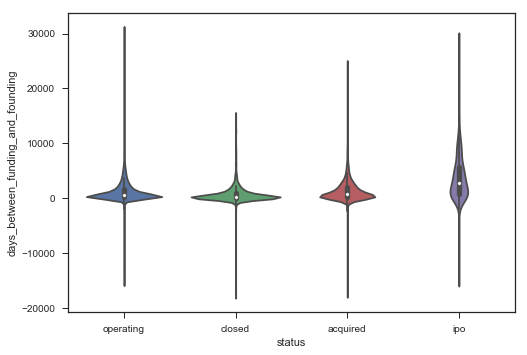

In [42]:
companies['days_between_funding_and_founding'] = companies['first_funding_at'] - companies['founded_at']
companies['days_between_funding_and_founding'] = companies['days_between_funding_and_founding']  / np.timedelta64(1,'D')

new_df = companies[['status','days_between_funding_and_founding']]

sb.violinplot(y="days_between_funding_and_founding", x = 'status', data=new_df)

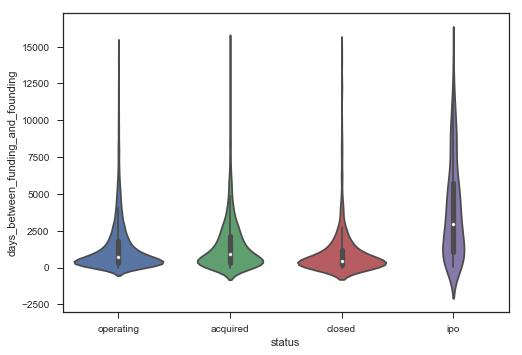

In [75]:
#let's remove companies with the negative difference -- that might be a mistake at the data aggregation stage
positive_values = new_df['days_between_funding_and_founding'] > 0
pos_val_new_df = new_df[positive_values]
#let's also limit to differences less than 15000 days to get a better visualization
no_outliers = pos_val_new_df['days_between_funding_and_founding'] < 15000
no_outliers_new_df = pos_val_new_df[no_outliers]
sb.violinplot(y="days_between_funding_and_founding", x = 'status', data=no_outliers_new_df)

In [44]:
pos_val_new_df.groupby('status')['days_between_funding_and_founding'].median()

status
acquired      921.0
closed        470.0
ipo          3050.0
operating     753.0
Name: days_between_funding_and_founding, dtype: float64

It's interesting that companies that closed down rushed to get the funding, waiting a little more than a year after getting founded. Taking operating companies as the 'average company', it's clear that 470 days is less time than an average company would take to get funding (753 days).

Let's look at averages as well to get the full picture. 

In [45]:
pos_val_new_df.groupby('status')['days_between_funding_and_founding'].mean()

status
acquired     1591.578670
closed       1027.338197
ipo          4132.484642
operating    1523.506126
Name: days_between_funding_and_founding, dtype: float64

#### Investments dataset

The second dataset that Crunchbase offers focuses on investments into start-ups, e.g. all the funding rounds that each start-up has received. Let's study that data set as well. 

In [46]:
investments = pd.read_csv('investments.csv')

C:\Users\Lana\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
investments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83893 entries, 0 to 83892
Data columns (total 21 columns):
company_permalink         83893 non-null object
company_name              83893 non-null object
company_category_code     82284 non-null object
company_country_code      80845 non-null object
company_state_code        59216 non-null object
company_region            83893 non-null object
company_city              78974 non-null object
investor_permalink        83893 non-null object
investor_name             83893 non-null object
investor_category_code    4465 non-null object
investor_country_code     63904 non-null object
investor_state_code       45503 non-null object
investor_region           83893 non-null object
investor_city             62653 non-null object
funding_round_type        83892 non-null object
funded_at                 83892 non-null object
funded_month              83892 non-null object
funded_quarter            83892 non-null object
funded_year               83

In [76]:
investments.head(3)

,permalink,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_category_code,...,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd,id
0,/company/tokita-investments,Tokita Investments,consulting,JPN,NaN,TBD,Okinawa Ken,/company/01startups,01Startups,NaN,...,NaN,unknown,NaN,angel,9/26/2013,2013-09,2013-Q3,2013.0,5000.0,1
1,/company/advercar,AdverCar,advertising,USA,CA,SF Bay,San Francisco,/company/1-800-flowers-com,1-800-FLOWERS.COM,ecommerce,...,NY,New York,New York,series-a,10/30/2012,2012-10,2012-Q4,2012.0,2000000.0,2
2,/company/launchgram,LaunchGram,news,USA,CA,SF Bay,Mountain View,/company/10xelerator,10Xelerator,finance,...,OH,Columbus,Columbus,other,1/23/2012,2012-01,2012-Q1,2012.0,20000.0,3


In [50]:
#making sure that permalinks all translate into the same name between the two files.
investments[investments.company_name.str.contains('Zettics')]

,company_permalink,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_category_code,...,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd,id
24502,/company/zettics-3,Zettics.,mobile,USA,WA,Seattle,Seattle,/financial-organization/emergence-capital-part...,Emergence Capital Partners,NaN,...,CA,SF Bay,San Mateo,series-b,4/27/2010,2010-04,2010-Q2,2010.0,7000000.0,24503
24517,/company/zettics-2,Zettics.com,analytics,USA,NY,New York,New York,/financial-organization/emergence-capital-part...,Emergence Capital Partners,NaN,...,CA,SF Bay,San Mateo,venture,7/14/2011,2011-07,2011-Q3,2011.0,8000000.0,24518
24539,/company/zettics,Zettics,software,USA,NaN,SF Bay,Concord,/financial-organization/emergence-capital-part...,Emergence Capital Partners,NaN,...,CA,SF Bay,San Mateo,series-a,7/24/2013,2013-07,2013-Q3,2013.0,8200000.0,24540
47986,/company/zettics-2,Zettics.com,analytics,USA,NY,New York,New York,/financial-organization/north-bridge-venture-p...,North Bridge Venture Partners,NaN,...,MA,Boston,Waltham,venture,7/14/2011,2011-07,2011-Q3,2011.0,8000000.0,47987
48026,/company/zettics,Zettics,software,USA,NaN,SF Bay,Concord,/financial-organization/north-bridge-venture-p...,North Bridge Venture Partners,NaN,...,MA,Boston,Waltham,series-a,7/24/2013,2013-07,2013-Q3,2013.0,8200000.0,48027
49803,/company/zettics-3,Zettics.,mobile,USA,WA,Seattle,Seattle,/financial-organization/openair-ventures,OPENAIR Equity Partners,NaN,...,MO,Kansas City,Kansas City,series-b,4/27/2010,2010-04,2010-Q2,2010.0,7000000.0,49804
49804,/company/zettics-2,Zettics.com,analytics,USA,NY,New York,New York,/financial-organization/openair-ventures,OPENAIR Equity Partners,NaN,...,MO,Kansas City,Kansas City,venture,7/14/2011,2011-07,2011-Q3,2011.0,8000000.0,49805
60974,/company/zettics-3,Zettics.,mobile,USA,WA,Seattle,Seattle,/financial-organization/steamboat-ventures,Steamboat Ventures,NaN,...,CA,Los Angeles,Burbank,series-b,4/27/2010,2010-04,2010-Q2,2010.0,7000000.0,60975
60982,/company/zettics-2,Zettics.com,analytics,USA,NY,New York,New York,/financial-organization/steamboat-ventures,Steamboat Ventures,NaN,...,CA,Los Angeles,Burbank,venture,7/14/2011,2011-07,2011-Q3,2011.0,8000000.0,60983
60985,/company/zettics,Zettics,software,USA,NaN,SF Bay,Concord,/financial-organization/steamboat-ventures,Steamboat Ventures,NaN,...,CA,Los Angeles,Burbank,series-a,7/24/2013,2013-07,2013-Q3,2013.0,8200000.0,60986


While we should merge the two datasets on the investments.permalink = companies.company_permalink, we should keep in mind that certain duplicate columns might have to be deleted (name vs. company_name, category_code vs. company_category_code, country_code vs. company_country_code, state_code vs. company_state_code, region vs. company_region, city vs. company_city).

### Merging 2 datasets

In [51]:
#we will be merging both dataset on the permalink column
investments = investments.rename(columns = {'company_permalink': 'permalink'})
companies_investments = pd.merge (companies, investments, on = 'permalink')

len(companies_investments['permalink'])

66847

In [77]:
#dropping duplicate columns
companies_investments = companies_investments.drop(['name', 'category_code', 'country_code', 'state_code', 'region', 'city'], 1)

ValueError: labels ['name' 'category_code' 'country_code' 'state_code' 'region' 'city'] not contained in axis

In [78]:
#checking at the row level to make sure merge was performed correctly.
companies_investments[companies_investments.company_name == 'Zettics']

,permalink,homepage_url,funding_total_usd,status,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,...,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd,id_y
66242,/company/zettics,http://zettics.com,8200000.0,operating,1,2008-01-01,2008-01,2008-Q1,2008.0,2013-07-24,...,CA,SF Bay,San Mateo,series-a,7/24/2013,2013-07,2013-Q3,2013.0,8200000.0,24540
66243,/company/zettics,http://zettics.com,8200000.0,operating,1,2008-01-01,2008-01,2008-Q1,2008.0,2013-07-24,...,MA,Boston,Waltham,series-a,7/24/2013,2013-07,2013-Q3,2013.0,8200000.0,48027
66244,/company/zettics,http://zettics.com,8200000.0,operating,1,2008-01-01,2008-01,2008-Q1,2008.0,2013-07-24,...,CA,Los Angeles,Burbank,series-a,7/24/2013,2013-07,2013-Q3,2013.0,8200000.0,60986
66245,/company/zettics,http://zettics.com,8200000.0,operating,1,2008-01-01,2008-01,2008-Q1,2008.0,2013-07-24,...,WA,Seattle,Seattle,series-a,7/24/2013,2013-07,2013-Q3,2013.0,8200000.0,68350


In [54]:
companies_investments[companies_investments.company_name == 'Zettics'].investor_name

66242       Emergence Capital Partners
66243    North Bridge Venture Partners
66244               Steamboat Ventures
66245                  Voyager Capital
Name: investor_name, dtype: object

##### Investors vs. company status

Let's see how different investors fare in terms of their companies succeeding. Because Series A funding round is riskier, those investors that enter early will inevitably have less information about the start-up than investors that enter in Series B, C, etc. Also, some investors will continue reinvesting in the company through all or some of the remaining funding rounds. Finally, some companies won't even go beyond Series A funding round, either succeeding or failing soon thereafter. Hence, Series A funding round is the most interesting to look at: we only have the original investors that invested early with the most risk involved. This is what we are going to consider right now.

In [55]:
#narrowing it down to Series A funding round
investor_vs_status = companies_investments[companies_investments.funding_round_type == 'series-a']
investor_vs_status = companies_investments[['investor_name','status']]
investor_vs_status = investor_vs_status.groupby('investor_name')['status'].value_counts()
investor_vs_status = investor_vs_status.unstack()
investor_vs_status = investor_vs_status.reset_index()

Let's see which investors have helped the most companies get listed

In [56]:
investor_vs_status.sort_values('ipo', ascending = False).head(10)

status,investor_name,acquired,closed,ipo,operating
12190,Sequoia Capital,100.0,29.0,34.0,299.0
7699,Kleiner Perkins Caufield & Byers,63.0,12.0,26.0,278.0
9592,New Enterprise Associates,62.0,23.0,23.0,307.0
7645,Khosla Ventures,23.0,12.0,19.0,148.0
1622,Bessemer Venture Partners,38.0,3.0,17.0,173.0
3266,DAG Ventures,27.0,5.0,16.0,100.0
3879,Domain Associates,3.0,4.0,15.0,54.0
1563,Benchmark,55.0,3.0,14.0,175.0
6351,Intel Capital,88.0,32.0,14.0,311.0
249,Accel Partners,94.0,13.0,13.0,287.0


What about acquired companies?

In [57]:
investor_vs_status.sort_values('acquired', ascending = False).head(10)

status,investor_name,acquired,closed,ipo,operating
12190,Sequoia Capital,100.0,29.0,34.0,299.0
249,Accel Partners,94.0,13.0,13.0,287.0
11842,SV Angel,93.0,10.0,7.0,277.0
6351,Intel Capital,88.0,32.0,14.0,311.0
3978,Draper Fisher Jurvetson (DFJ),69.0,26.0,10.0,285.0
7699,Kleiner Perkins Caufield & Byers,63.0,12.0,26.0,278.0
8818,Menlo Ventures,62.0,10.0,7.0,124.0
9592,New Enterprise Associates,62.0,23.0,23.0,307.0
14745,Y Combinator,58.0,44.0,NaN,283.0
4731,First Round Capital,56.0,13.0,2.0,223.0


And what about those closed companies?

In [58]:
investor_vs_status.sort_values('closed', ascending = False).head(10)

status,investor_name,acquired,closed,ipo,operating
14745,Y Combinator,58.0,44.0,NaN,283.0
6351,Intel Capital,88.0,32.0,14.0,311.0
12190,Sequoia Capital,100.0,29.0,34.0,299.0
3978,Draper Fisher Jurvetson (DFJ),69.0,26.0,10.0,285.0
13277,Techstars,30.0,24.0,NaN,192.0
9592,New Enterprise Associates,62.0,23.0,23.0,307.0
9826,North Bridge Venture Partners,30.0,19.0,5.0,89.0
2632,Charles River Ventures,45.0,18.0,7.0,112.0
12755,Startupbootcamp,2.0,18.0,NaN,82.0
13978,US Venture Partners,45.0,18.0,4.0,136.0


Now let's look at proportions

In [59]:
investor_vs_status['proportion_ipo'] = investor_vs_status['ipo']/(investor_vs_status['ipo'] + investor_vs_status['operating'] + investor_vs_status['acquired'] + investor_vs_status['closed'])

investor_vs_status['proportion_acquired'] = investor_vs_status['acquired']/(investor_vs_status['ipo'] + investor_vs_status['operating'] + investor_vs_status['acquired'] + investor_vs_status['closed'])

investor_vs_status['proportion_closed'] = investor_vs_status['closed']/(investor_vs_status['ipo'] + investor_vs_status['operating'] + investor_vs_status['acquired'] + investor_vs_status['closed'])


IPO: 

In [60]:
investor_vs_status.sort_values('proportion_ipo', ascending = False).head(10)

status,investor_name,acquired,closed,ipo,operating,proportion_ipo,proportion_acquired,proportion_closed
3694,Deerfield Capital Management,1.0,1.0,5.0,4.0,0.454545,0.090909,0.090909
6469,Iroquois Capital,2.0,1.0,5.0,5.0,0.384615,0.153846,0.076923
10437,Pegasus Capital,1.0,1.0,2.0,2.0,0.333333,0.166667,0.166667
5449,Great Point Partners,2.0,1.0,3.0,4.0,0.300000,0.200000,0.100000
2888,Clarus Ventures,10.0,1.0,10.0,13.0,0.294118,0.294118,0.029412
11733,SAIF Partners,2.0,1.0,10.0,21.0,0.294118,0.058824,0.029412
4495,European Founders Fund,2.0,3.0,5.0,9.0,0.263158,0.105263,0.157895
10902,Quaker BioVentures,1.0,5.0,6.0,11.0,0.260870,0.043478,0.217391
9268,Morgan Stanley,5.0,1.0,6.0,12.0,0.250000,0.208333,0.041667
6300,Innovatech Qu_bec,1.0,1.0,2.0,4.0,0.250000,0.125000,0.125000


Acquired:

In [61]:
investor_vs_status.sort_values('proportion_acquired', ascending = False).head(10)

status,investor_name,acquired,closed,ipo,operating,proportion_ipo,proportion_acquired,proportion_closed
2051,Brian Pokorny,8.0,1.0,1.0,1.0,0.090909,0.727273,0.090909
9273,Morgan Stanley Venture Partners,6.0,1.0,1.0,3.0,0.090909,0.545455,0.090909
13966,UMC Capital,6.0,1.0,1.0,4.0,0.083333,0.500000,0.083333
12652,Sprout Group,6.0,1.0,1.0,4.0,0.083333,0.500000,0.083333
2967,Columbia Capital,27.0,3.0,1.0,26.0,0.017544,0.473684,0.052632
12280,Shea Ventures,9.0,1.0,1.0,8.0,0.052632,0.473684,0.052632
13558,Three Arch Partners,14.0,3.0,1.0,13.0,0.032258,0.451613,0.096774
1950,Brad Feld,4.0,1.0,1.0,3.0,0.111111,0.444444,0.111111
3982,Draper Richards,16.0,2.0,1.0,19.0,0.026316,0.421053,0.052632
394,Advent Venture Partners,13.0,1.0,1.0,16.0,0.032258,0.419355,0.032258


Closed: 

In [62]:
investor_vs_status.sort_values('proportion_closed', ascending = False).head(10)

status,investor_name,acquired,closed,ipo,operating,proportion_ipo,proportion_acquired,proportion_closed
10926,Quester Capital,1.0,5.0,2.0,6.0,0.142857,0.071429,0.357143
13814,TransCosmos,1.0,6.0,2.0,10.0,0.105263,0.052632,0.315789
9375,NGEN Partners,1.0,7.0,1.0,16.0,0.040000,0.040000,0.280000
942,Anthem Capital Management,1.0,2.0,1.0,4.0,0.125000,0.125000,0.250000
711,American Capital,1.0,2.0,1.0,4.0,0.125000,0.125000,0.250000
14811,Yossi Vardi,3.0,3.0,1.0,6.0,0.076923,0.230769,0.230769
10902,Quaker BioVentures,1.0,5.0,6.0,11.0,0.260870,0.043478,0.217391
3125,Covera Ventures,8.0,4.0,1.0,7.0,0.050000,0.400000,0.200000
7906,Latterell Venture Partners,1.0,3.0,2.0,9.0,0.133333,0.066667,0.200000
9169,Mission Ventures,10.0,9.0,3.0,23.0,0.066667,0.222222,0.200000


My hypothesis is that the choice of an investor (which can be a proxy for the quality of the start-up or its management in some cases) does influence the success or failure of start-ups, along with the level and the timing of funding. The data story does point out some differences in these factors for closed and acquired/listed companies. So in the capstone project I will attempt to predict the success of a start-up using all of these factors and the other variables from these two datasets. There is one more dataset, acquisitions.csv, which is not as essential to the present analysis and which I won't explore today, but which might add further variables to our prediction model in the future.

### Inferential statistics
#### Testing the difference in means for average funding rounds between successful and unsuccessful companies

Now that we have a sense for the data and the dataset has more or less been cleaned up, it's time to test a few of our hypotheses.<br></br><br></br>The first hypothesis that we will test is whether there is a significant difference in the average funding round size for start-ups that were acquired and start-ups that closed and, similarly, between start-ups that got listed and start-ups that had to shut down.

To implement that, first we will create a column within the companies dataset for the average funding round size, by dividing total funding received by the total number of funding rounds.

In [63]:
companies['average_funding_round'] = companies['funding_total_usd']/companies['funding_rounds']

Then we have to separate average funding rounds for companies that closed from average funding rounds for companies that got acquired and for companies that got listed.

In [64]:
avg_funding_round_acquired = companies[companies.status == 'acquired'].average_funding_round.dropna()
avg_funding_round_closed = companies[companies.status == 'closed'].average_funding_round.dropna()
avg_funding_round_ipo = companies[companies.status == 'ipo'].average_funding_round.dropna()

To be able to test any hypothesis, we need to ascertain that some underlying assumptions are satisfied. First, we need to figure out if the sample is large enough. If so, to be able to assume that the sampling distribution of the sample proportion is approximately normal (based on the CLT theorem), we need to assure to the best of our ability that the data was sampled randomly and that each observation was sampled independently from the other observations. The main assumption that I will make with this dataset is that Crunchbase data is comprehensive, i.e. we are actually dealing with the entire population of start-ups at the given moment. We also probably don't have to worry about the independence of observations, given that, supposedly, funding rounds within one company should not influence the size of a funding round in another company.

However, to visualize the average funding distribution, let's plot the distribution of the average funding rounds.

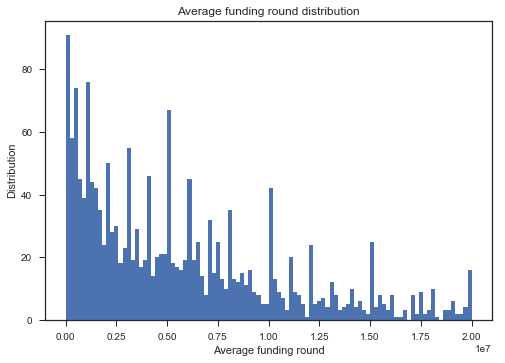

In [65]:
fig, ax = plt.subplots()

nbins = 100
xmin = 0
xmax = 20000000

ax = plt.hist(avg_funding_round_acquired, bins = nbins, range = [xmin, xmax])
plt.xlabel("Average funding round")
plt.ylabel("Distribution")
plt.title("Average funding round distribution")

In [66]:
print('Mean of the average funding round for acquired companies is: {:2f}'.format(np.mean(avg_funding_round_acquired)))
print('Standard deviation of the average funding round for acquired companies is: {:2f}'.format(np.std(avg_funding_round_acquired)))

Mean of the average funding round for acquired companies is: 10566621.570428
Standard deviation of the average funding round for acquired companies is: 37678829.603529


On average, each funding round for acquired companies was around USD 10.5m, with a standard deviation of USD 37.7m

What about listed companies?

In [67]:
print('Mean of the average funding round for acquired companies is: {:2f}'.format(np.mean(avg_funding_round_ipo)))
print('Standard deviation of the average funding round for acquired companies is: {:2f}'.format(np.std(avg_funding_round_ipo)))

Mean of the average funding round for acquired companies is: 45705770.382869
Standard deviation of the average funding round for acquired companies is: 124327935.569257


Listed companies seem to receive even more money per funding round, USD 45.7m. So what about closed companies?

In [68]:
print('Mean of the average funding round for acquired companies is: {:2f}'.format(np.mean(avg_funding_round_closed)))
print('Standard deviation of the average funding round for acquired companies is: {:2f}'.format(np.std(avg_funding_round_closed)))

Mean of the average funding round for acquired companies is: 4270461.191927
Standard deviation of the average funding round for acquired companies is: 11203593.007527


The average funding round seems to be much lower in this case. But is it significantly lower?

Before we test it, let's see how big our sample sizes are for each of the company types:

In [69]:
print('The sample size for closed companies is {:2f}'.format(len(avg_funding_round_closed)))
print('The sample size for acquired companies is {:2f}'.format(len(avg_funding_round_acquired)))
print('The sample size for listed companies is {:2f}'.format(len(avg_funding_round_ipo)))

The sample size for closed companies is 1807.000000
The sample size for acquired companies is 1964.000000
The sample size for listed companies is 453.000000


The samples sizes are sufficiently large, which should allow us to rely on the CLT theorem to assume that the sampling distribtion of the sample mean is approximately normally distributed.

We are ready to test the difference in means then. 

Ho: difference in an average funding round for acquired and closed companies = 0<br></br>
Ha: difference in an average funding round for aqcuired and closed companies is greater than or less than 0

In [70]:
import scipy.stats as stats
stats.ttest_ind(avg_funding_round_acquired, avg_funding_round_closed)

Ttest_indResult(statistic=6.8290439255951414, pvalue=9.9234542036418469e-12)

With a such a small p-value, we can reject the null hypothesis at the lowest, 1% significance level. This analysis seems to suggest that, on average, companies that will eventually close down receive less money from investors in each funding round, which is especially interesting given that the two sample sizes were approximately the same to begin with.

Now for comparison purposes let's test whether there is a significant diffence in the average size of funding rounds for listed and acquired companies. 

In [71]:
stats.ttest_ind(avg_funding_round_acquired, avg_funding_round_ipo)

Ttest_indResult(statistic=-10.588365809502781, pvalue=1.2195277964942263e-25)

In this case, the p-value is even smaller, which seems to imply that even for acquired and listed companies (i.e. the successful companies in our analysis) the difference in the average funding round size is significant. <br></br><br></br>At the same time, it is also important to understand the limitations of hypothesis testing, so, while it's an interesting result, it should only be used as an additional factor to consider as opposed to concrete evidence that the two types of start-ups are different.